# Write a general code to do DE analysis on any dataset
  - input: IDs of controls and samples
  - output: table that results from %R head(deg)

In [25]:
import sys, pandas as pd
sys.path.append('scripts')
import archs4
from importlib import reload
import code_library
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [36]:
%%R
file.path("scripts")

[1] "scripts"


In [40]:
%%R
source('code_library')


Error in file(filename, "r", encoding = encoding) : 
  cannot open the connection


## 1. Miller et al. (2013)

In [2]:
rawcount_dataframe, sample_metadata_dataframe = archs4.fetch_dataset("GSE52431")
rawcount_dataframe.head()

,GSM1266739,GSM1266740,GSM1266741,GSM1266742,GSM1266743,GSM1266744,GSM1266745,GSM1266746
ID_REF,,,,,,,,
A1BG,450,458,183,330,634,831,239,358
A1CF,35,86,8,15,66,75,7,25
A2M,41,57,133,215,103,52,103,105
A2ML1,117,149,17,24,137,145,21,50
A2MP1,29,36,4,5,42,71,8,14


In [3]:
sample_metadata_dataframe.head()

,!Sample_title,!Sample_characteristics_ch1,platform
!Sample_geo_accession,,,
GSM1266739,WT-82 y iPSC-mDA + Nuclear GFP n 1,cell type: iPSC-derived midbrain dopamine (mDA...,GPL11154
GSM1266740,WT-82 y iPSC-mDA + Nuclear GFP n 3,cell type: iPSC-derived midbrain dopamine (mDA...,GPL11154
GSM1266741,WT-82 y iPSC-mDA + GFP-progerin p 1,cell type: iPSC-derived midbrain dopamine (mDA...,GPL11154
GSM1266742,WT-82 y iPSC-mDA + GFP-progerin p 3,cell type: iPSC-derived midbrain dopamine (mDA...,GPL11154
GSM1266743,WT-11 y iPSC-mDA + Nuclear GFP n 1,cell type: iPSC-derived midbrain dopamine (mDA...,GPL11154


In [4]:
metadata = pd.read_csv('metadata_GSE52431.csv', sep=';', 
                                      index_col = 'Accession Number',
                                      names = ["Accession Number", "Cell Type", "Donor Age",
                                               "Expression Construct", "5"])
metadata.drop('5', axis=1, inplace=True)
metadata

,Cell Type,Donor Age,Expression Construct
Accession Number,,,
GSM1266739,iPSC-derived midbrain dopamine (mDA) neurons,82,Nuclear GFP
GSM1266740,iPSC-derived midbrain dopamine (mDA) neurons,82,Nuclear GFP
GSM1266741,iPSC-derived midbrain dopamine (mDA) neurons,82,Progerin GFP
GSM1266742,iPSC-derived midbrain dopamine (mDA) neurons,82,Progerin GFP
GSM1266743,iPSC-derived midbrain dopamine (mDA) neurons,11,Nuclear GFP
GSM1266744,iPSC-derived midbrain dopamine (mDA) neurons,11,Nuclear GFP
GSM1266745,iPSC-derived midbrain dopamine (mDA) neurons,11,Progerin GFP
GSM1266746,iPSC-derived midbrain dopamine (mDA) neurons,11,Progerin GFP


In [5]:
%Rpush rawcount_dataframe
%Rpush metadata

In [6]:
%%R
head(rawcount_dataframe)

        GSM1266739 GSM1266740 GSM1266741 GSM1266742 GSM1266743 GSM1266744
A1BG           450        458        183        330        634        831
A1CF            35         86          8         15         66         75
A2M             41         57        133        215        103         52
A2ML1          117        149         17         24        137        145
A2MP1           29         36          4          5         42         71
A3GALT2          6          6          1          8          6          1
        GSM1266745 GSM1266746
A1BG           239        358
A1CF             7         25
A2M            103        105
A2ML1           21         50
A2MP1            8         14
A3GALT2          1          9


In [7]:
%%R
metadata

                                              Cell.Type Donor.Age
GSM1266739 iPSC-derived midbrain dopamine (mDA) neurons        82
GSM1266740 iPSC-derived midbrain dopamine (mDA) neurons        82
GSM1266741 iPSC-derived midbrain dopamine (mDA) neurons        82
GSM1266742 iPSC-derived midbrain dopamine (mDA) neurons        82
GSM1266743 iPSC-derived midbrain dopamine (mDA) neurons        11
GSM1266744 iPSC-derived midbrain dopamine (mDA) neurons        11
GSM1266745 iPSC-derived midbrain dopamine (mDA) neurons        11
GSM1266746 iPSC-derived midbrain dopamine (mDA) neurons        11
           Expression.Construct
GSM1266739          Nuclear GFP
GSM1266740          Nuclear GFP
GSM1266741         Progerin GFP
GSM1266742         Progerin GFP
GSM1266743          Nuclear GFP
GSM1266744          Nuclear GFP
GSM1266745         Progerin GFP
GSM1266746         Progerin GFP


In [8]:
# Rename metadata components in Expression Construct
metadata_renamed = metadata.copy()
metadata_renamed['Expression Construct'] = [x.replace(' GFP', '') for x in metadata_renamed['Expression Construct']]

In [9]:
%%R -i metadata_renamed
# Show new names in column Expression Construct
design.mat <- model.matrix(~ 0 + metadata_renamed$Expression.Construct)
design.mat

  metadata_renamed$Expression.ConstructNuclear
1                                            1
2                                            1
3                                            0
4                                            0
5                                            1
6                                            1
7                                            0
8                                            0
  metadata_renamed$Expression.ConstructProgerin
1                                             0
2                                             0
3                                             1
4                                             1
5                                             0
6                                             0
7                                             1
8                                             1
attr(,"assign")
[1] 1 1
attr(,"contrasts")
attr(,"contrasts")$`metadata_renamed$Expression.Construct`
[1] "contr.treatment"



In [31]:
%%R
source('code_library.R')
ls()


Error in file(filename, "r", encoding = encoding) : 
  cannot open the connection


In [15]:
limma_dataframe = code_library.compute_degs(rawcount_dataframe, 
                                            ['GSM1266741','GSM1266742','GSM1266745',
                                             'GSM1266746'], 
                                            ['GSM1266739','GSM1266740','GSM1266743',
                                             'GSM1266744'])
limma_dataframe.head()

            controls  samples
GSM1266739         1        0
GSM1266740         1        0
GSM1266741         0        1
GSM1266742         0        1
GSM1266743         1        0
GSM1266744         1        0
GSM1266745         0        1
GSM1266746         0        1


,logFC,AveExpr,t,P.Value,adj.P.Val,B
TPRG1,-95.00,62.500,-22.652360,2.304861e-07,0.005297,2.132479
APELA,-65.50,47.250,-21.722848,3.006375e-07,0.005297,2.103543
POLQ,-87.75,65.875,-19.552712,5.853245e-07,0.006875,2.020813
RP13-130D24.1,-88.00,54.500,-18.456813,8.425716e-07,0.007423,1.968749
RIBC2,-63.25,39.125,-17.009606,1.409488e-06,0.009272,1.885946


In [12]:
limma_dataframe.logFC.max()

16297882.250000002

In [13]:
import seaborn as sns
%matplotlib inline

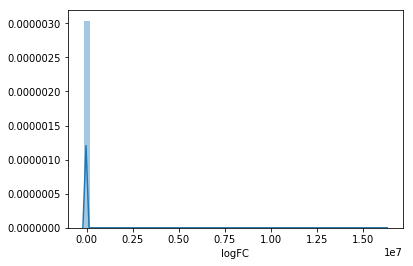

In [14]:
sns.distplot(limma_dataframe['logFC'])